In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')

In [2]:
train_data = pd.read_csv('/home/adeesha/repos/DengAI/dengue_features_train.csv', parse_dates=[3])
test_data = pd.read_csv('/home/adeesha/repos/DengAI/dengue_features_test.csv',parse_dates=[3])
labels_train = pd.read_csv('/home/adeesha/repos/DengAI/dengue_labels_train.csv')
submission_data = pd.read_csv('/home/adeesha/repos/DengAI/submission_format.csv')
train_data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [3]:
data = pd.concat([train_data, labels_train], axis=1, join_axes=[train_data.index])
_,i = np.unique(data.columns, return_index=True)
data = data.iloc[:,i]

data.head()

,city,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,week_start_date,weekofyear,year
0,sj,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,...,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,1990-04-30,18,1990
1,sj,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,...,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,1990-05-07,19,1990
2,sj,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,...,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,1990-05-14,20,1990
3,sj,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,...,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,1990-05-21,21,1990
4,sj,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,...,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,1990-05-28,22,1990


In [4]:
data_sj = data[data['city']=='sj']
data_iq = data[data['city']=='iq']

# set index to the dates
data_sj.set_index('week_start_date', drop = True, inplace = True)
data_iq.set_index('week_start_date', drop = True, inplace = True)

#drop non-numerical values
data_sj.drop(['city', 'year'], axis = 1, inplace = True)
data_iq.drop(['city', 'year'], axis = 1, inplace = True)

## FrontFill to Impute into Missing values

data_sj = data_sj.fillna(method = 'ffill')
data_iq = data_iq.fillna(method = 'ffill')

/home/adeesha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/adeesha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [5]:
test_data_sj = test_data[test_data['city']=='sj']
test_data_iq = test_data[test_data['city']=='iq']

# set index to the dates
test_data_sj.set_index('week_start_date', drop = True, inplace = True)
test_data_iq.set_index('week_start_date', drop = True, inplace = True)

#drop non-numerical values
test_data_sj.drop(['city', 'year'], axis = 1, inplace = True)
test_data_iq.drop(['city', 'year'], axis = 1, inplace = True)

## FrontFill to Impute into Missing values

test_data_sj = test_data_sj.fillna(method = 'ffill')
test_data_iq = test_data_iq.fillna(method = 'ffill')
test_data_iq.tail()

/home/adeesha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/adeesha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
week_start_date,,,,,,,,,,,,,,,,,,,,,
2013-05-28,22,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,298.964286,295.638571,305.5,...,67.60,89.990000,41.12,17.185714,10.100000,27.40,9.050,32.6,21.8,33.0
2013-06-04,23,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,298.328571,295.845714,306.3,...,45.70,93.891429,71.52,17.448571,9.657143,27.52,10.720,33.8,21.4,68.0
2013-06-11,24,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,296.607143,294.894286,304.6,...,45.22,94.967143,78.96,16.410000,7.385714,27.20,10.075,32.6,21.6,93.2
2013-06-18,25,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,297.400000,293.648571,305.9,...,4.70,89.057143,39.54,15.137143,8.228571,26.70,8.480,32.2,21.8,34.1
2013-06-25,26,0.339467,0.240071,0.356943,0.273600,51.80,297.372857,299.000000,294.615714,307.3,...,27.80,87.030000,51.80,16.148571,11.542857,27.35,9.675,32.6,22.0,14.9


In [6]:
# create month variable
data_sj['month'] = data_sj.index.month
data_iq['month'] = data_iq.index.month

# create mean ndvi
data_sj['ndvi_mean'] = (data_sj['ndvi_ne'] + data_sj['ndvi_nw'] + data_sj['ndvi_se'] + data_sj['ndvi_sw']) / 4.0
data_iq['ndvi_mean'] = (data_iq['ndvi_ne'] + data_iq['ndvi_nw'] + data_iq['ndvi_se'] + data_iq['ndvi_sw']) / 4.0

data.reanalysis_air_temp_k = data.reanalysis_air_temp_k - 273
data.reanalysis_avg_temp_k = data.reanalysis_avg_temp_k - 273
data.reanalysis_dew_point_temp_k = data.reanalysis_dew_point_temp_k - 273
data.reanalysis_max_air_temp_k = data.reanalysis_max_air_temp_k - 273
data.reanalysis_min_air_temp_k   = data.reanalysis_min_air_temp_k - 273
data.tail()

,city,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,week_start_date,weekofyear,year
1451,iq,0.342750,0.318900,0.256343,0.292514,55.30,26.334286,27.771429,23.825714,36.7,...,9.800000,28.633333,11.933333,35.4,22.4,27.0,5,2010-05-28,21,2010
1452,iq,0.160157,0.160371,0.136043,0.225657,86.47,25.330000,26.392857,23.452857,35.5,...,7.471429,27.433333,10.500000,34.7,21.7,36.6,8,2010-06-04,22,2010
1453,iq,0.247057,0.146057,0.250357,0.233714,58.94,23.598571,24.592857,22.501429,32.5,...,7.500000,24.400000,6.900000,32.2,19.2,7.4,1,2010-06-11,23,2010
1454,iq,0.333914,0.245771,0.278886,0.325486,59.67,23.345714,24.521429,22.324286,33.1,...,7.871429,25.433333,8.733333,31.2,21.0,16.0,1,2010-06-18,24,2010
1455,iq,0.298186,0.232971,0.274214,0.315757,63.22,25.097143,26.835714,22.807143,34.8,...,11.014286,27.475000,9.900000,33.7,22.2,20.4,4,2010-06-25,25,2010


In [7]:
# create month variable
test_data_sj['month'] = test_data_sj.index.month
test_data_iq['month'] = test_data_iq.index.month

# create mean ndvi
test_data_sj['ndvi_mean'] = (test_data_sj['ndvi_ne'] + test_data_sj['ndvi_nw'] + test_data_sj['ndvi_se'] + test_data_sj['ndvi_sw']) / 4.0
test_data_iq['ndvi_mean'] = (test_data_iq['ndvi_ne'] + test_data_iq['ndvi_nw'] + test_data_iq['ndvi_se'] + test_data_iq['ndvi_sw']) / 4.0

data.reanalysis_air_temp_k = data.reanalysis_air_temp_k - 273
data.reanalysis_avg_temp_k = data.reanalysis_avg_temp_k - 273
data.reanalysis_dew_point_temp_k = data.reanalysis_dew_point_temp_k - 273
data.reanalysis_max_air_temp_k = data.reanalysis_max_air_temp_k - 273
data.reanalysis_min_air_temp_k   = data.reanalysis_min_air_temp_k - 273
data.tail()

,city,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,week_start_date,weekofyear,year
1451,iq,0.342750,0.318900,0.256343,0.292514,55.30,-246.665714,-245.228571,-249.174286,-236.3,...,9.800000,28.633333,11.933333,35.4,22.4,27.0,5,2010-05-28,21,2010
1452,iq,0.160157,0.160371,0.136043,0.225657,86.47,-247.670000,-246.607143,-249.547143,-237.5,...,7.471429,27.433333,10.500000,34.7,21.7,36.6,8,2010-06-04,22,2010
1453,iq,0.247057,0.146057,0.250357,0.233714,58.94,-249.401429,-248.407143,-250.498571,-240.5,...,7.500000,24.400000,6.900000,32.2,19.2,7.4,1,2010-06-11,23,2010
1454,iq,0.333914,0.245771,0.278886,0.325486,59.67,-249.654286,-248.478571,-250.675714,-239.9,...,7.871429,25.433333,8.733333,31.2,21.0,16.0,1,2010-06-18,24,2010
1455,iq,0.298186,0.232971,0.274214,0.315757,63.22,-247.902857,-246.164286,-250.192857,-238.2,...,11.014286,27.475000,9.900000,33.7,22.2,20.4,4,2010-06-25,25,2010


## creating test/train set

In [8]:
sj_train_subtrain = data_sj.head(800)
sj_train_subtest = data_sj.tail(data_sj.shape[0] - 800)

iq_train_subtrain = data_iq.head(400)
iq_train_subtest = data_iq.tail(data_iq.shape[0] - 400)

## creating residuals

In [9]:
lr_sj = LinearRegression()
X = pd.get_dummies(sj_train_subtrain['month'], prefix='month')
y = sj_train_subtrain['total_cases'].values

lr_sj.fit(X, y)
monthly_trend_train = pd.Series(lr_sj.predict(X)).rolling(3, min_periods = 1).mean()
sj_residuals_train = y - monthly_trend_train

print(len(monthly_trend_train ))

800


In [10]:
lr_iq = LinearRegression()
X = pd.get_dummies(iq_train_subtrain['month'], prefix='month')
y = iq_train_subtrain['total_cases'].values

lr_iq.fit(X, y)
monthly_trend_train = pd.Series(lr_iq.predict(X)).rolling(3, min_periods = 1).mean()
iq_residuals_train = y - monthly_trend_train

print(len(iq_residuals_train))

400


## smooth features

In [11]:
features = ['ndvi_mean','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','precipitation_amt_mm','reanalysis_air_temp_k','reanalysis_avg_temp_k','reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k','reanalysis_precip_amt_kg_per_m2','reanalysis_relative_humidity_percent','reanalysis_sat_precip_amt_mm','reanalysis_specific_humidity_g_per_kg','reanalysis_tdtr_k','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm']

In [12]:
def smooth_feature(df,feature,window_size):
    temp_df = df[feature].rolling(window = window_size).mean()
    return temp_df.fillna(method = 'bfill')

def smooth_df(df,window_size):
    temp_df = pd.DataFrame()
    columns = list(df.columns.values)
    for col in columns:
        train_feature = smooth_feature(df,col,window_size)
        temp_df = pd.concat([temp_df, train_feature], axis=1)
    return temp_df

In [13]:
sj_train_subtrain_smooth = smooth_df(sj_train_subtrain[features],52)
iq_train_subtrain_smooth = smooth_df(iq_train_subtrain[features],52)

sj_train_subtrain_smooth = sj_train_subtrain_smooth.assign(residuals=sj_residuals_train.values)
iq_train_subtrain_smooth = iq_train_subtrain_smooth.assign(residuals=iq_residuals_train.values)


## calculate correlations

In [14]:
sj_correlations = sj_train_subtrain_smooth.corr()
iq_correlations = iq_train_subtrain_smooth.corr()

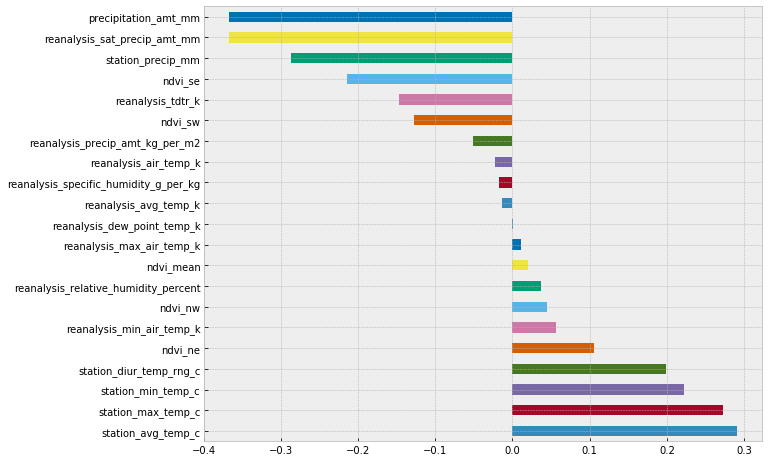

In [15]:
plt.figure(figsize=(10, 8))
(sj_correlations
     .residuals
     .drop('residuals') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

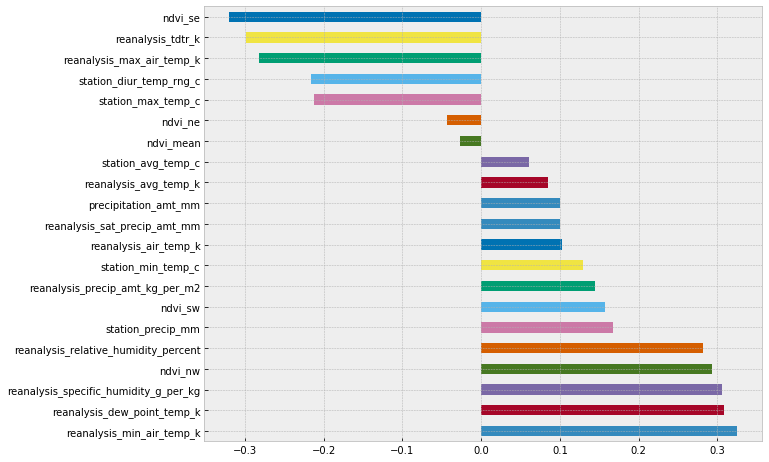

In [16]:
plt.figure(figsize=(10, 8))
(iq_correlations
     .residuals
     .drop('residuals') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

## Create model for sj

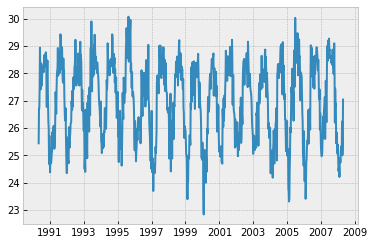

In [29]:
# rolling means data_sj
train_feature1 = smooth_feature(sj_train_subtrain,'ndvi_se',16)
train_feature2 = smooth_feature(sj_train_subtrain,'station_avg_temp_c',52)
test_feature1 = smooth_feature(data_sj,'ndvi_se',16)
test_feature2 = smooth_feature(data_sj,'station_avg_temp_c',52)

plt.plot(data_sj['station_avg_temp_c'])
test_feature1.describe()
plt.show()

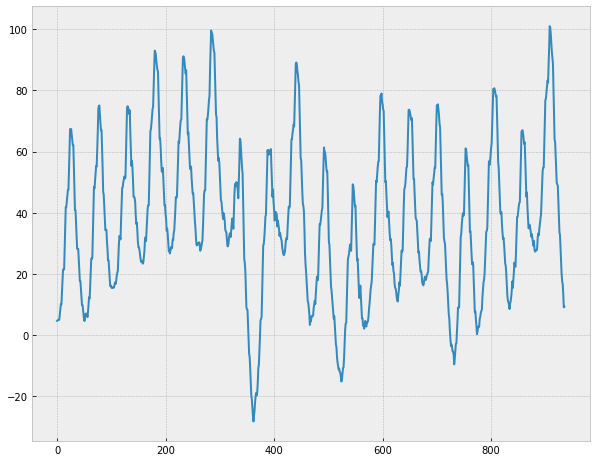

In [18]:
#Xtrain = pd.concat([train_feature1], axis = 1)
Xtrain = pd.concat([train_feature2], axis = 1)
ytrain = sj_residuals_train

#Xtest = pd.concat([test_feature1], axis = 1)
Xtest = pd.concat([test_feature2], axis = 1)
ytest = sj_train_subtest.total_cases

lr_sj_resids = LinearRegression()
lr_sj_resids.fit(Xtrain, ytrain)

sj_valid_preds = lr_sj_resids.predict(Xtest)

#predict monthly trend
monthly_trend_train_sj = pd.Series(lr_sj.predict(pd.get_dummies(sj_train_subtest['month'], prefix='month'))).rolling(3, min_periods = 1).mean()
monthly_trend_sj = pd.Series(lr_sj.predict(pd.get_dummies(data_sj['month'], prefix='month'))).rolling(3, min_periods = 1).mean()

#sj_valid_preds = sj_valid_preds+monthly_trend_train_sj.values
# train_preds_sj = pd.DataFrame(sj_valid_preds)
# train_preds_sj.to_csv("train_preds_sj.csv",encoding='utf-8', index=False)
sj_train = sj_valid_preds + monthly_trend_sj.values
sj_train = pd.DataFrame(sj_train)
sj_train.to_csv("sj_train_xxx.csv",encoding='utf-8', index=False)
# print (mean_absolute_error(sj_valid_preds, ytest))

plt.figure(figsize=(10, 8))

plt.plot(sj_train)

plt.show()

## create model for iq

In [19]:
# rolling means data_iq
train_feature1 = smooth_feature(iq_train_subtrain,'ndvi_se',16)
train_feature2 = smooth_feature(iq_train_subtrain,'station_avg_temp_c',52)
test_feature1 = smooth_feature(data_iq,'ndvi_se',16)
test_feature2 = smooth_feature(data_iq,'station_avg_temp_c',52)

test_feature2.describe()

count    520.000000
mean      27.472832
std        0.229316
min       27.073077
25%       27.326859
50%       27.485497
75%       27.630649
max       27.992853
Name: station_avg_temp_c, dtype: float64

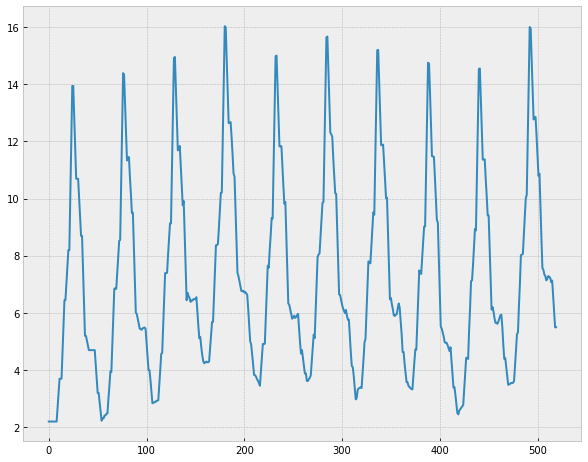

In [20]:
#Xtrain = pd.concat([train_feature1], axis = 1)
Xtrain = pd.concat([train_feature2], axis = 1)
ytrain = iq_residuals_train

#Xtest = pd.concat([test_feature1], axis = 1)
Xtest = pd.concat([test_feature2], axis = 1)
ytest = iq_train_subtest.total_cases

lr_iq_resids = LinearRegression()
lr_iq_resids.fit(Xtrain, ytrain)

iq_valid_preds = lr_iq_resids.predict(Xtest)

monthly_trend_train_iq = pd.Series(lr_iq.predict(pd.get_dummies(iq_train_subtest['month'], prefix='month'))).rolling(3, min_periods = 1).mean()
monthly_trend_iq = pd.Series(lr_iq.predict(pd.get_dummies(data_iq['month'], prefix='month'))).rolling(3, min_periods = 1).mean()



# iq_valid_preds = iq_valid_preds+monthly_trend_train_iq.values
# iq_residuals = data_iq.total_cases.values - monthly_trend_iq.values
# train_preds_iq = pd.DataFrame(iq_valid_preds)
# train_preds_iq.to_csv("train_preds_iq.csv",encoding='utf-8', index=False)
iq_train = iq_valid_preds + monthly_trend_iq.values

# print (mean_absolute_error(iq_valid_preds, ytest))

plt.figure(figsize=(10, 8))


plt.plot(iq_train)

plt.show()

## submission prediction

### data_sj

In [21]:
#creating reresiduals
lr_sj = LinearRegression()
X = pd.get_dummies(data_sj['month'], prefix='month')
y = data_sj['total_cases'].values

lr_sj.fit(X, y)
monthly_trend_train = pd.Series(lr_sj.predict(X)).rolling(3, min_periods = 1).mean()
sj_residuals_train = y - monthly_trend_train

print(len(sj_residuals_train))

936


In [22]:
train_feature1 = smooth_feature(data_sj,'ndvi_se',16)
train_feature2 = smooth_feature(data_sj,'station_avg_temp_c',52)
test_feature1 = smooth_feature(test_data_sj,'ndvi_se',16)
test_feature2 = smooth_feature(test_data_sj,'station_avg_temp_c',52)

test_feature2.describe()

count    260.000000
mean      27.178928
std        0.322907
min       26.668132
25%       26.986951
50%       27.045879
75%       27.460234
max       27.832692
Name: station_avg_temp_c, dtype: float64

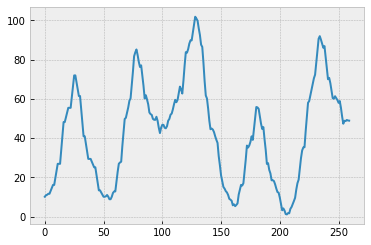

In [23]:
#Xtrain = pd.concat([train_feature1], axis = 1)
Xtrain = pd.concat([train_feature2], axis = 1)
ytrain = sj_residuals_train

#Xtest = pd.concat([test_feature1], axis = 1)
Xtest = pd.concat([test_feature2], axis = 1)


lr_sj_resids = LinearRegression()
lr_sj_resids.fit(Xtrain, ytrain)

sj_valid_preds = lr_sj_resids.predict(Xtest)

#predict monthly trend
trend_sj = LinearRegression()
X = pd.get_dummies(data_sj['month'], prefix='month')
y = data_sj['total_cases'].values

trend_sj.fit(X, y)
monthly_trend_train_sj = pd.Series(trend_sj.predict(pd.get_dummies(test_data_sj['month'], prefix='month'))).rolling(3, min_periods = 1).mean()
residual_preds_sj = pd.DataFrame(sj_valid_preds)
monthly_trend_train_sj.to_csv("monthly_trend_train_sj.csv",encoding='utf-8', index=False)
residual_preds_sj.to_csv("residual_preds_sj.csv",encoding='utf-8', index=False)
sj_valid_preds = sj_valid_preds+monthly_trend_train_sj.values

plt.plot(sj_valid_preds)

plt.show()

### data_iq

In [24]:
#creating reresiduals
lr_iq = LinearRegression()
X = pd.get_dummies(data_iq['month'], prefix='month')
y = data_iq['total_cases'].values

lr_iq.fit(X, y)
monthly_trend_train = pd.Series(lr_iq.predict(X)).rolling(3, min_periods = 1).mean()
iq_residuals_train = y - monthly_trend_train

print(len(iq_residuals_train))

520


In [25]:
train_feature1 = smooth_feature(data_iq,'ndvi_se',16)
train_feature2 = smooth_feature(data_iq,'station_min_temp_c',52)
test_feature1 = smooth_feature(test_data_iq,'ndvi_se',16)
test_feature2 = smooth_feature(test_data_iq,'station_min_temp_c',52)

test_feature1.describe()

count    156.000000
mean       0.257599
std        0.018798
min        0.212871
25%        0.245372
50%        0.256932
75%        0.272445
max        0.294953
Name: ndvi_se, dtype: float64

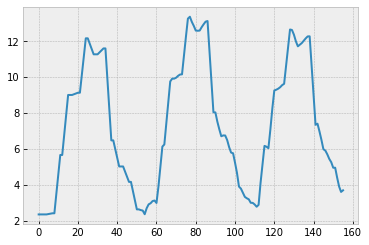

In [26]:
#Xtrain = pd.concat([train_feature1], axis = 1)
Xtrain = pd.concat([train_feature2], axis = 1)
ytrain = iq_residuals_train

#Xtest = pd.concat([test_feature1], axis = 1)
Xtest = pd.concat([test_feature2], axis = 1)


lr_iq_resids = LinearRegression()
lr_iq_resids.fit(Xtrain, ytrain)

iq_valid_preds = lr_iq_resids.predict(Xtest)

#predict monthly trend
trend_iq = LinearRegression()
X = pd.get_dummies(data_iq['month'], prefix='month')
y = data_iq['total_cases'].values

trend_iq.fit(X, y)
monthly_trend_train_iq = pd.Series(trend_iq.predict(pd.get_dummies(test_data_iq['month'], prefix='month'))).rolling(3, min_periods = 1).mean()
residual_preds_iq = pd.DataFrame(iq_valid_preds)
monthly_trend_train_iq.to_csv("monthly_trend_train_iq.csv",encoding='utf-8', index=False)
residual_preds_iq.to_csv("residual_preds_iq.csv",encoding='utf-8', index=False)

iq_valid_preds = iq_valid_preds+monthly_trend_train_iq.values

plt.plot(iq_valid_preds)
plt.show()

In [27]:
sj_valid_preds = sj_valid_preds.astype(int)
iq_valid_preds = iq_valid_preds.astype(int)

test_pred = np.concatenate([sj_valid_preds, iq_valid_preds])
submission_data.total_cases = pd.DataFrame(test_pred)
submission_data.to_csv("submission_smoothing.csv",encoding='utf-8', index=False)

#### 21.4591
'ndvi_se',16
'station_avg_temp_c',52